Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [3]:
print(f'Largest value for Tesla in Web Search:{df_tesla.TSLA_WEB_SEARCH.max()} ')
print(f'Smallest value for Tesla in Web Search:{df_tesla.TSLA_WEB_SEARCH.min()} ')

Largest value for Tesla in Web Search:31 
Smallest value for Tesla in Web Search:2 


In [4]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [5]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search:{df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} ')

Largest value for "Unemployemnt Benefits" in Web Search:100 


### Bitcoin

In [6]:
print(f'largest BTC News Search:{df_btc_search.BTC_NEWS_SEARCH.max()} ')

largest BTC News Search:100 


# Data Cleaning

### Check for Missing Values

In [7]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()} ')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False 
Missing values for U/E?: False
Missing values for BTC Search?: False


In [8]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [9]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


### Convert Strings to DateTime Objects

In [10]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [11]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


### Converting from Daily to Monthly Data

In [12]:
df_btc_monthly = df_btc_price.resample('ME', on='DATE').last()

In [13]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


### Tesla Stock Price v.s. Search Volume

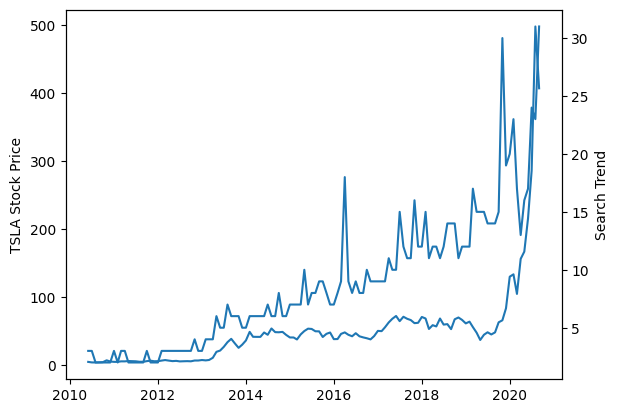

In [16]:
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

Add colours to style the chart. This will help differentiate the two lines and the axis labels.

In [17]:
years=mdates.YearLocator()
months=mdates.MonthLocator()
years_fmt=mdates.DateFormatter('%Y')

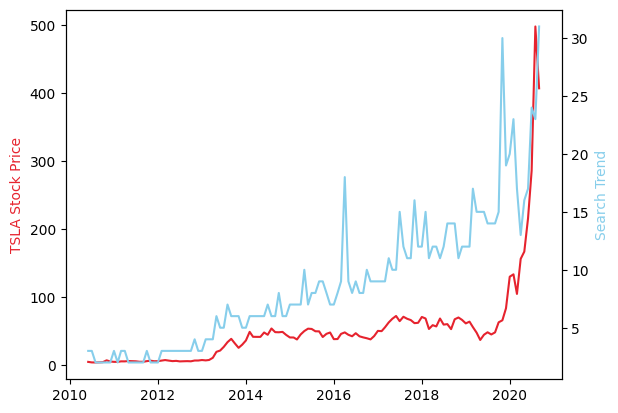

In [18]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')


Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

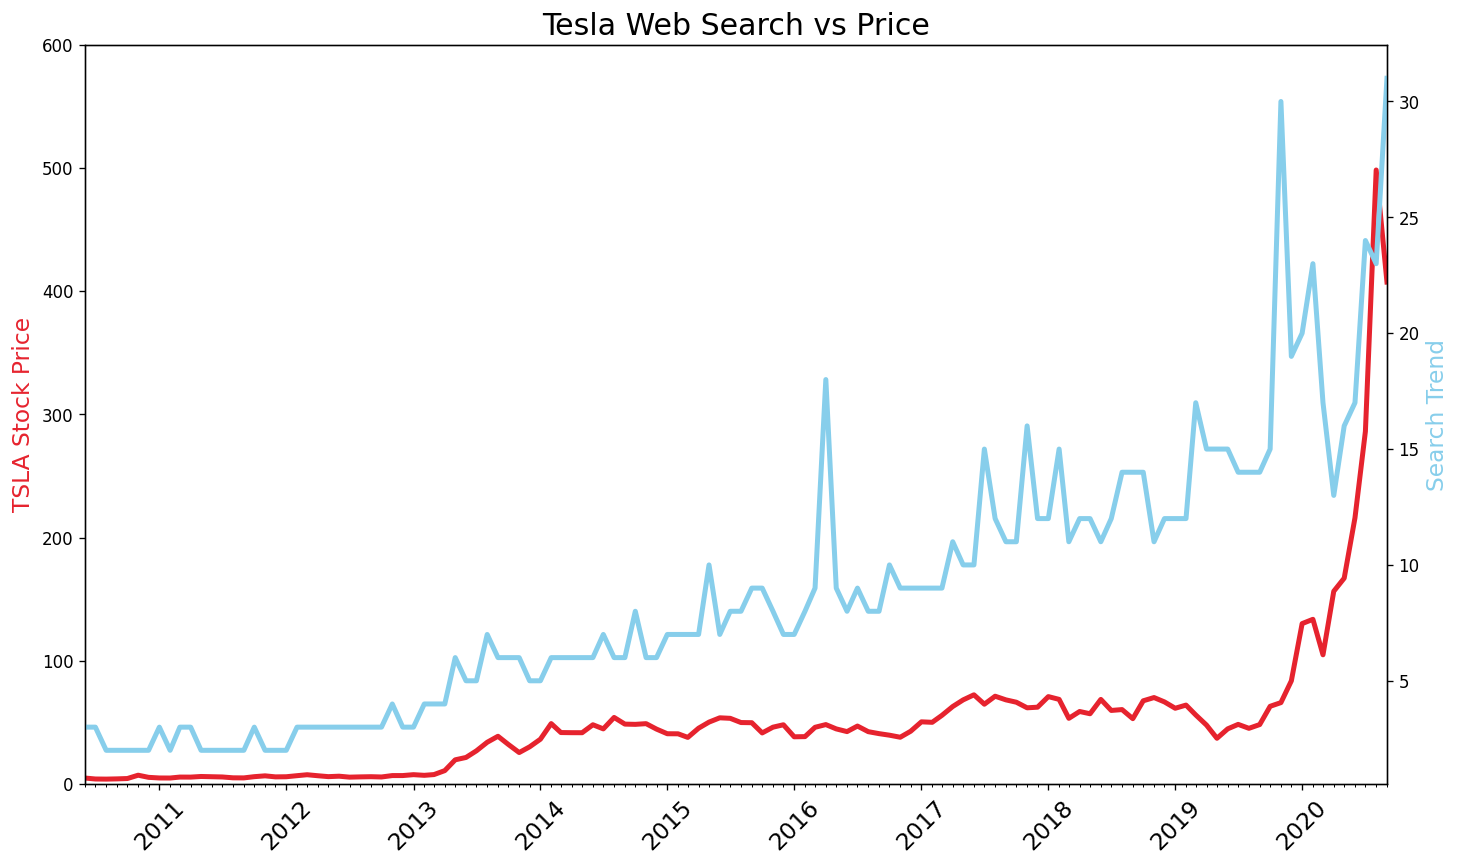

In [19]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

Create the same chart for the Bitcoin Prices vs. Search volumes.

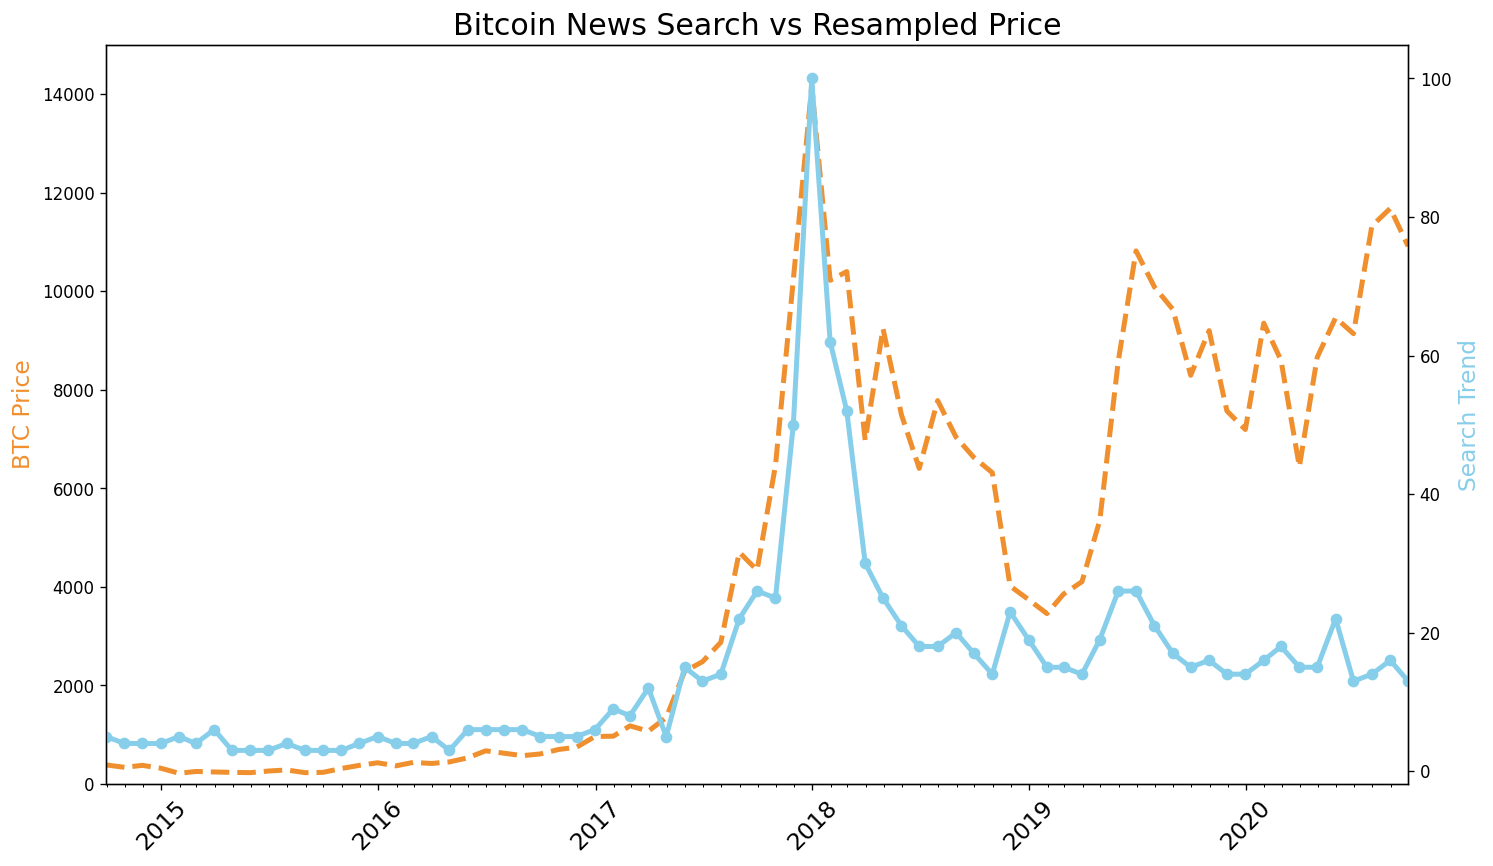

In [20]:
plt.figure(figsize=(14,8), dpi=120)

plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
         color='skyblue', linewidth=3, marker='o')

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plot the search for "unemployment benefits" against the unemployment rate.

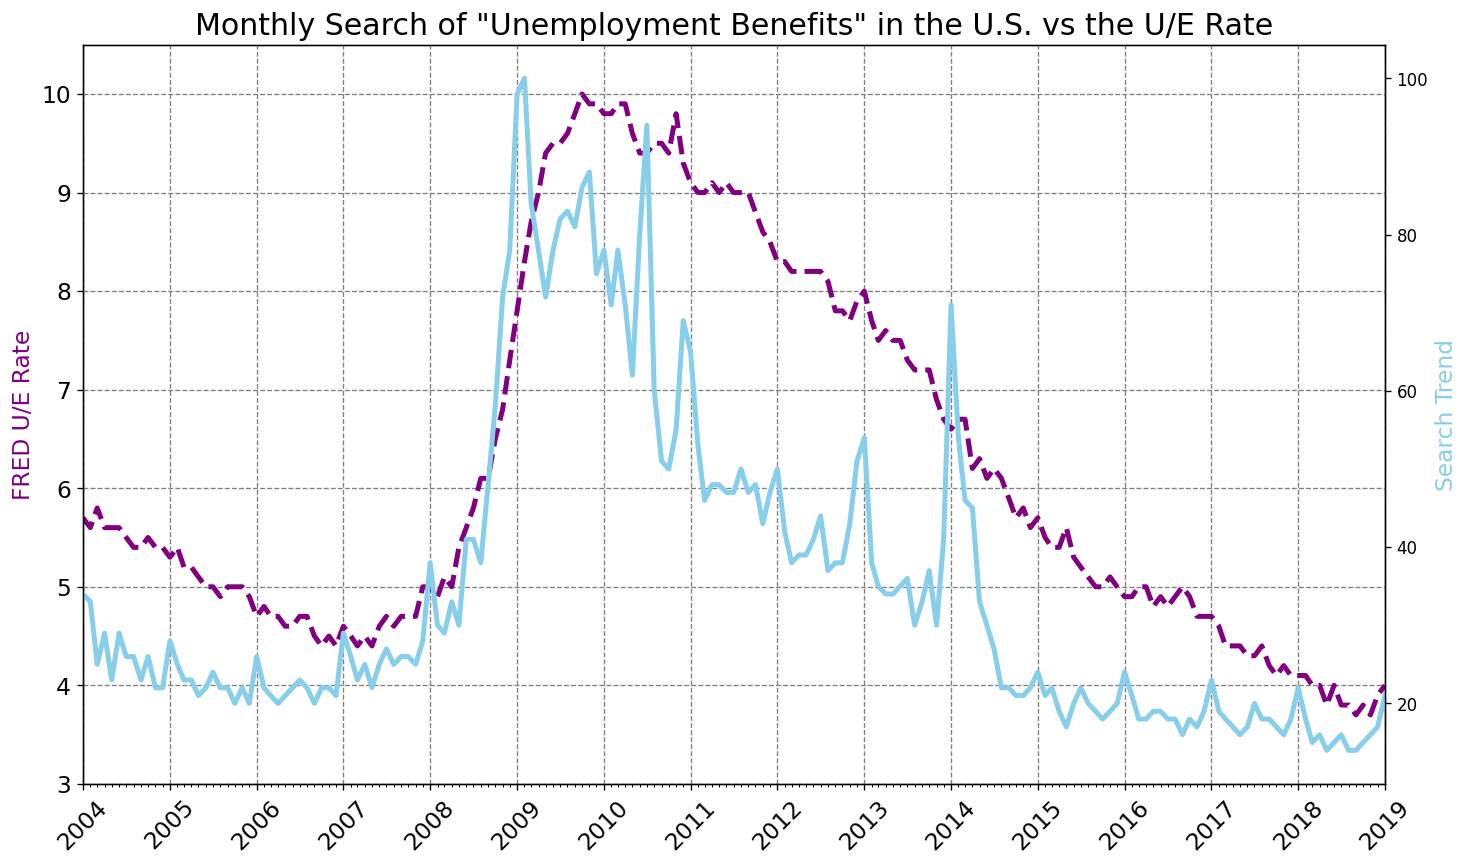

In [21]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart.

In [22]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

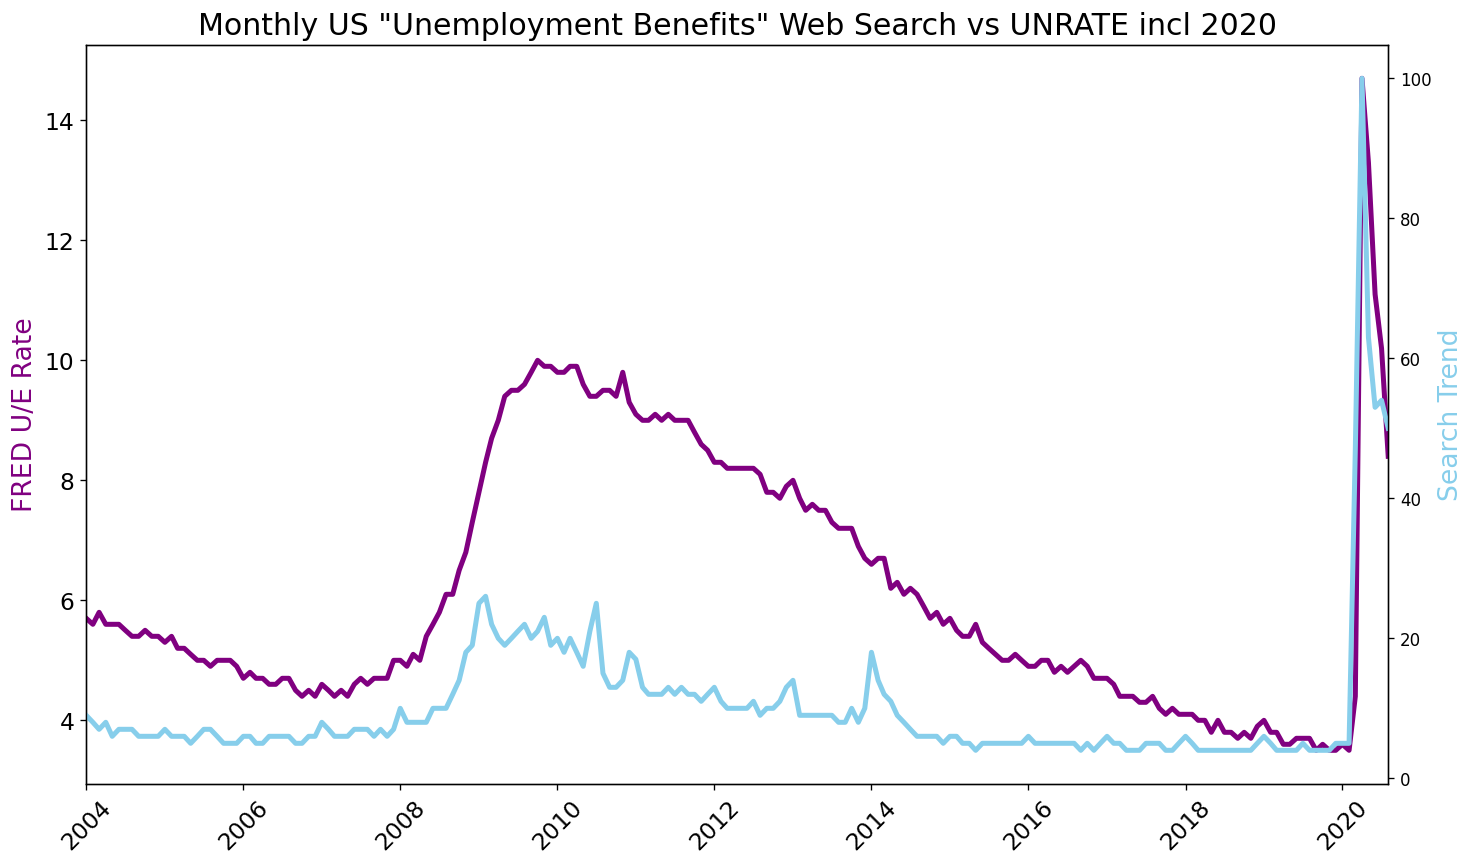

In [23]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()